# Interactive Geographical maps with Geopandas

### Installing GeoPandas

In [2]:
#!pip install geopandas
#!pip install folium matplotlib mapclassify         # for interactivity


Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
     |████████████████████████████████| 7.5 MB 2.3 MB/s 
     |████████████████████████████████| 1.2 MB 37.1 MB/s 
     |████████████████████████████████| 19.3 MB 22.5 MB/s 
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
     |████████████████████████████████| 97 kB 5.9 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Importing necessary libraries

In [3]:
import geopandas 
from geopandas import GeoDataFrame
from geopandas import points_from_xy
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Printing version of geopandas
print(geopandas.__version__)

0.10.2


### Plotting Static Maps with GeoPandas

### Reading in the data

In [5]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Where
* naturalearth_lowres → contours of countries
* naturalearth_cities → positions of cities
* nybb → New York boroughs





Let's use the `naturalearth_lowres` dataset and display the dataset.

In [6]:
world_filepath = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(world_filepath)
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Visualizing the data
To plot the active geometry, we'll call theGeoDataFrame.plot().This will generate a plot of the geometry column using matplotlib.

<AxesSubplot:>

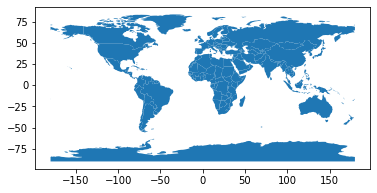

In [7]:
world.plot()

#### Color coding by a specific column

Text(0.5, 1.0, 'World Population')

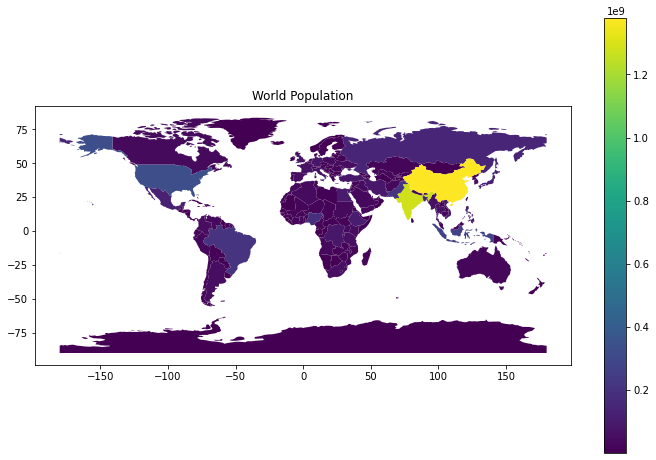

In [9]:
world.plot('pop_est', legend=True,figsize=(12,8))
plt.title('World Population')


#### Colormaps

Text(0.5, 1.0, 'World Population with colormap: Set2')

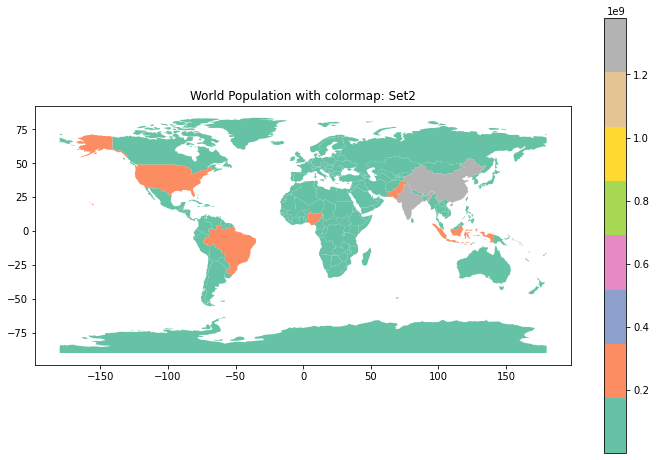

In [10]:
cmap='Set2'
world.plot('pop_est', cmap=cmap, legend=True,figsize=(12,8))
plt.title(f'World Population with colormap: {cmap}')

Text(0.5, 1.0, 'World Population with colormap: magma')

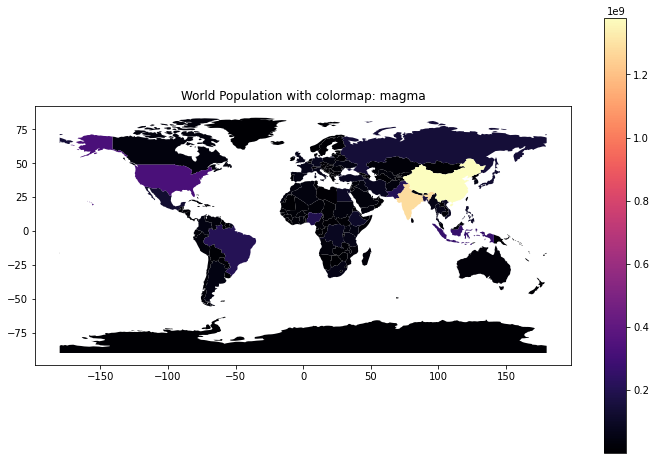

In [11]:
cmap='magma'
world.plot('pop_est', cmap=cmap, legend=True,figsize=(12,8))
plt.title(f'World Population with colormap: {cmap}')

#### Boundaries

<AxesSubplot:>

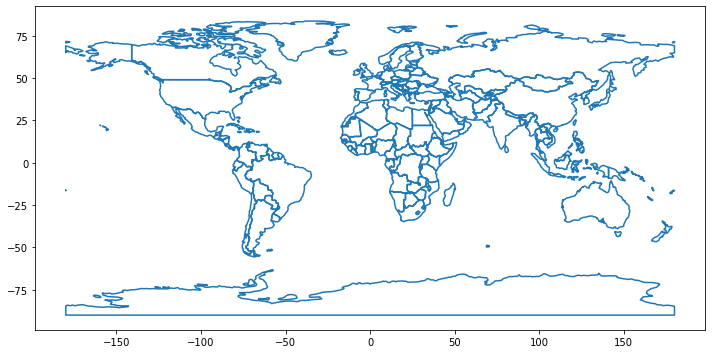

In [22]:
world.boundary.plot(figsize=(12,8))

## Plotting Interactive Maps

In [23]:
world.explore(column='pop_est',cmap='Set2')

## Calculating GDP for Asia

In [24]:
asia = world[world['continent'] =='Asia']
asia.explore(column='gdp_md_est',cmap='Set2')

### Available tiles

This parameter specifies the tile to be used. The built-in options include : 
OpenStreetMap, Stamen Terrain, Stamen Toner, Stamen Watercolor,  CartoDB positron, CartoDB dark_matter where OpenStreetMap is used by deafult.

In [51]:
asia = world[world['continent'] =='Asia']
asia.explore(column='gdp_md_est',legend=False,tiles='Stamen Terrain')

  

In [52]:
asia = world[world['continent'] =='Asia']

asia.explore(column='gdp_md_est',legend=False,tiles='Stamen Toner')
   

In [53]:
asia = world[world['continent'] =='Asia']

asia.explore(column='gdp_md_est',legend=False,tiles='Stamen Watercolor')

In [54]:
asia = world[world['continent'] =='Asia']

asia.explore(column='gdp_md_est',legend=False,tiles='CartoDB positron')

In [55]:
asia = world[world['continent'] =='Asia']

asia.explore(column='gdp_md_est',legend=False,tiles='CartoDB dark_matter')

## Using your own data
Till now we have used the custom datasets that come preloaded with the library. In reality, we would like to work with our own datasets. A dataset containing a latitude and a longitude column can be easily converted into a GeoPandas dataframe which can then be used as a geometry column for visualization.

To demonstrate the technique, I'm borrowing the dataset from my articles : [Visualizing India's Seismic activity](https://towardsdatascience.com/visualizing-indias-seismic-activity-4ed390de298c)

In [56]:
df = pd.read_csv('Indian_earthquake_data.csv')
df.head(10)

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"
5,2021-07-30 04:39:14 IST,38.52,73.27,115.0,5.2,"286km NE of Fayzabad, Afghanistan"
6,2021-07-30 03:33:16 IST,27.90,94.20,10.0,3.0,"48km W of Basar, Arunachal Pradesh, India"
7,2021-07-29 18:47:30 IST,26.60,92.51,28.0,3.1,"28km WSW of Tezpur, Assam, India"
8,2021-07-29 14:09:29 IST,22.88,95.95,10.0,5.5,"107km N of Burma, Myanmar"
9,2021-07-27 16:11:30 IST,37.96,72.39,160.0,4.3,"188km ENE of Fayzabad, Afghanistan"


Since the dataframe has a latitude and longitude column, it can be easily converted to a GeoPandas Dataframe. We'll write a simple function to do that:

In [61]:
from geopandas import GeoDataFrame
from geopandas import points_from_xy

geometry = points_from_xy(df['Latitude'],df['Longitude'])
df2 = GeoDataFrame(df, geometry=geometry)
df2.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,geometry
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",POINT (29.06000 77.42000)
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",POINT (19.93000 72.92000)
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",POINT (31.50000 74.37000)
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",POINT (28.34000 76.23000)
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",POINT (27.09000 89.97000)
